#Task1

In [3]:
!pip install validclust

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.setrecursionlimit(5000)
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,classification_report
from validclust import dunn
from sklearn.metrics import pairwise_distances
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import accuracy_score, recall_score,f1_score
from sklearn.cluster import AgglomerativeClustering

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Data1.csv to Data1.csv
Saving Data2.csv to Data2.csv
Saving Data3.csv to Data3.csv
Saving Data4.csv to Data4.csv
Saving Data5.csv to Data5.csv
Saving Data6.csv to Data6.csv
Saving Data7.csv to Data7.csv
Saving Data8.csv to Data8.csv


Here we customerize some functions to help us finish the task1.



*   kmeans(data, k) => Perform KMeans clustering.
*   draw_originalclass => Plot (2D or 3D) the data points for each dataset and color them according to the original class.
*   draw_pridictclass => Plot (2D or 3D) the data points for each dataset and color them according to the class allocated by the clustering algorithm.(No relabel)
*   draw_pridictclass2 => Plot (2D or 3D) the data points for each dataset and color them according to the class allocated by the clustering algorithm(Relabel)
*   relabel => Match the kmeans result labels to class labels.
*   relabel2 => Match the kmeans result labels to class labels.(For some dataset)
*   crp => Evaluate the performance of the clustering algorithm using external validation metrics.





In [ ]:

def kmeans(data, k):
    #x,y
    if(data.shape[1] == 4):
        pred = KMeans(n_clusters = k, random_state = 0).fit(data.iloc[:, 1:3])
        return pred
    #x,y,z
    elif (data.shape[1] == 5):
        pred = KMeans(n_clusters = k, random_state = 0).fit(data.iloc[:, 1:4])
        return pred
    else:
        print('The data formate should be x, y, class or x, y, z, class. Please check.') 

#For step3
def draw_originalclass(data):
    print(data.shape[1])
    if(data.shape[1] == 4):
        plt.scatter(data.iloc[:, 1], data.iloc[:, 2], c=data['Class'])
        plt.show()
    elif (data.shape[1] == 5):
        fig = plt.figure()  
        ax = Axes3D(fig)  
        ax.scatter(data.iloc[:, 1], data.iloc[:, 2], data.iloc[:, 3],c=data['Class'])
        ax.set_xlabel('X label')  
        ax.set_ylabel('Y label')
        ax.set_zlabel('Z label')
        plt.show()
    else:
        print('The data formate should be x, y, class or x, y, z, class. Please check')


#For step4--No relabel operation
def draw_pridictclass(data, pred):
    if(data.shape[1] == 4):
        plt.scatter(data.iloc[:, 1], data.iloc[:, 2], c=pred.labels_)
        plt.show()
    elif (data.shape[1] == 5):
        fig = plt.figure()  
        ax = Axes3D(fig)
        c = pred.labels_
        ax.scatter(data.iloc[:, 1], data.iloc[:, 2], data.iloc[:, 3], c=pred.labels_)  
        ax.set_xlabel('X label')  
        ax.set_ylabel('Y label')
        ax.set_zlabel('Z label')
        plt.show()
    else:
        print('The number of features of data should be 2 or 3, check the data.')

#For step4 --> relabel operation
def draw_pridictclass2(data,pred):
    if(data.shape[1]==4):
        plt.scatter(data.iloc[:, 1], data.iloc[:, 2], c=pred)
        plt.show()
    elif (data.shape[1] == 5):
        fig = plt.figure()  
        ax = Axes3D(fig)
        ax.scatter(data.iloc[:, 1], data.iloc[:, 2], data.iloc[:, 3], c=pred)  
        ax.set_xlabel('X label')  
        ax.set_ylabel('Y label')
        ax.set_zlabel('Z label')
        plt.show()
    else:
        print('The number of features  of data should be 2 or 3,check the data.')


#relabel
def relabel(data,pred):
    index=0
    label=-1
    relabel={}
    for i in pred.labels_:
        if i !=label and i not in relabel.keys():
            relabel[i]=data['Class'][index]
            label=i
        index=index+1
    newlabel = [relabel[i] for i in pred.labels_]
    return newlabel

#relabel -> for some datasets
def relabel2(data, pred):
    index = 0
    label = -1
    relabel = {}
    for i in pred.labels_:
        if i == 0:
            pred.labels_[index] = 2
        index = index + 1
    return pred.labels_

    
def crp(data,newlabels):
    #print("ConfusionMatrix", confusion_matrix(data['Class'], newlabels))
    print(classification_report(data['Class'], newlabels))

## Data1

### Kmeans

In [ ]:
df= pd.read_csv('Data1.csv')

In [ ]:
#step1
pre=kmeans(df,7)

In [ ]:
#step2
crp(df,relabel(df,pre))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00        30
           3       1.00      1.00      1.00        30
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        30

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212



In [ ]:
print('The accuracy_score:',accuracy_score(df['Class'],relabel(df,pre)))

The accuracy_score: 1.0


In [ ]:
print('The F_1_score:',f1_score(df['Class'],relabel(df,pre), average = 'micro'))

The F_1_score: 1.0


5


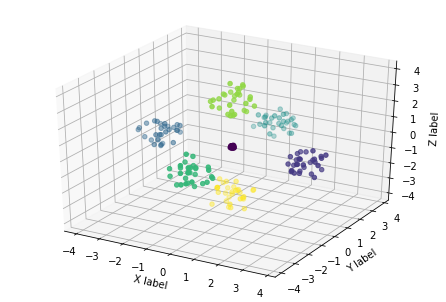

In [ ]:
#Step3
draw_originalclass(df)

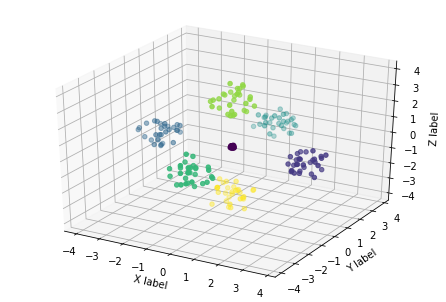

In [ ]:
#step4
draw_pridictclass2(df,relabel(df,pre))

### Hierarchical

In [ ]:
#Read data into dataframe
df_data1 = pd.read_csv('Data1.csv')

#number of clusters
n1 = df_data1['Class'].nunique()

#to match class range with clusters
df_data1['Class'] = df_data1['Class'] - 1

#Zipping datapoints
data1 = list(zip(df_data1['X1'], df_data1['X2'], df_data1['X3']))

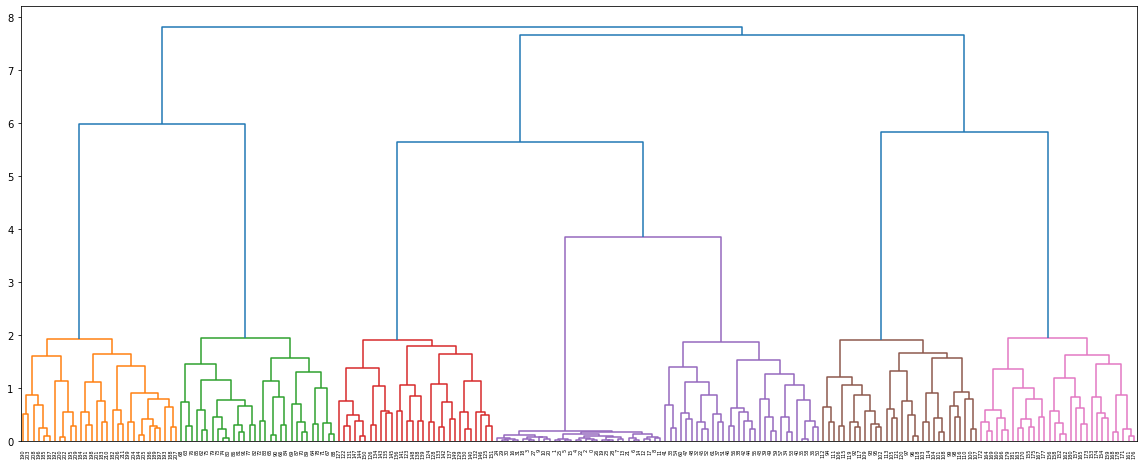

In [ ]:
#STEP1
#Dendogram

linkage_1 = linkage(data1, method='complete', metric='euclidean')
dendrogram(linkage_1)

plt.gcf().set_size_inches(20,8)
plt.show()

In [ ]:
clustering_model1 = AgglomerativeClustering(n_clusters = n1, affinity = 'euclidean', linkage = 'complete')
l1 = clustering_model1.fit_predict(data1)

In [ ]:
#To match the labels

df_data1 = df_data1.rename({'Unnamed: 0' :'Ind'}, axis='columns')
df_data1['Predicted'] = pd.Series(l1)

class_index_expected1 = df_data1.groupby('Class')['Ind'].apply(list).reset_index(name = 'List')
class_index_predicted1 = df_data1.groupby('Predicted')['Ind'].apply(list).reset_index(name = 'List')

for j in class_index_expected1['List']:
  for k in class_index_predicted1['List']:
    if j == k:
      for m in k:
        df_data1['Predicted'] = np.where(df_data1['Ind'] == m, df_data1['Class'], df_data1['Predicted'])
    elif len(np.intersect1d(j,k)) != 0:
      intersecting_elements = np.intersect1d(j, k)
      non_intersecting_elements = np.setxor1d(j, k)
      y = df_data1.loc[df_data1['Ind'] == intersecting_elements[0], 'Class']
      for m in intersecting_elements:
        df_data1['Predicted'] = np.where(df_data1['Ind'] == m, df_data1['Class'], df_data1['Predicted'])
      for n in non_intersecting_elements:
        df_data1['Predicted'] = np.where(df_data1['Ind'] == n, y, df_data1['Predicted'])

In [ ]:
#STEP2

print('Accuracy: ', accuracy_score(df_data1['Class'], df_data1['Predicted']))
print('F1 score: ', f1_score(df_data1['Class'], df_data1['Predicted'], average = 'micro'))

Accuracy:  1.0
F1 score:  1.0


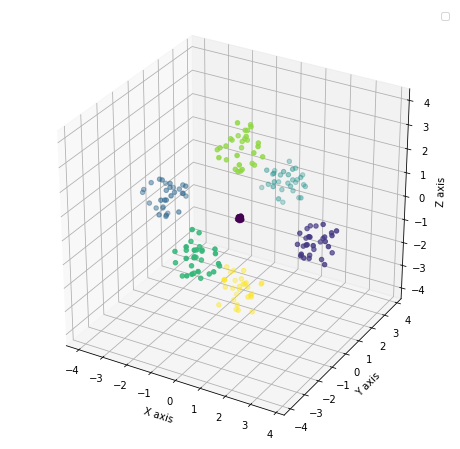

In [ ]:
#STEP3

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df_data1['X1'], df_data1['X2'], df_data1['X3'], c = df_data1['Class'])
ax.legend()
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.gcf().set_size_inches(8,8)

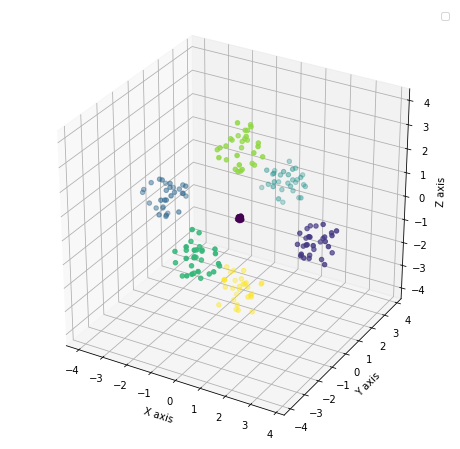

In [ ]:
#STEP4
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df_data1['X1'], df_data1['X2'], df_data1['X3'], c = df_data1['Predicted'])
ax.legend()
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.gcf().set_size_inches(8,8)

## Data2

### Kmeans

In [ ]:
df= pd.read_csv('Data2.csv')

In [ ]:
#step1
pre=kmeans(df,4)

In [ ]:
#step2
crp(df,relabel(df,pre))

              precision    recall  f1-score   support

           1       0.89      1.00      0.94       200
           2       0.95      0.76      0.84       100
           3       1.00      1.00      1.00       100
           4       0.00      0.00      0.00         4

    accuracy                           0.93       404
   macro avg       0.71      0.69      0.70       404
weighted avg       0.92      0.93      0.92       404



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('The accuracy_score:', accuracy_score(df['Class'], relabel(df, pre)))

The accuracy_score: 0.9306930693069307


In [ ]:
print('The F_1_score:', f1_score(df['Class'], relabel(df, pre), average = 'micro'))

The F_1_score: 0.9306930693069307


5


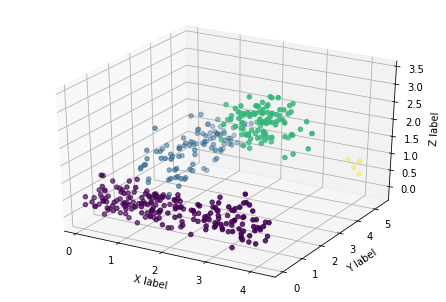

In [ ]:
#step3
draw_originalclass(df)

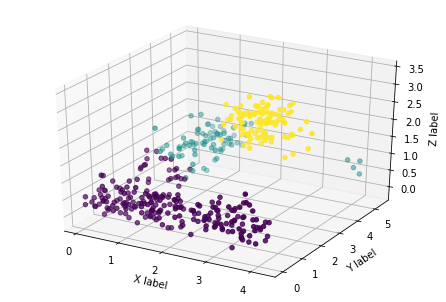

In [ ]:
#step4
draw_pridictclass2(df,relabel(df,pre))

### Hierarchical

In [ ]:
#Read data into dataframe
df_data2 = pd.read_csv('Data2.csv')

#number of clusters
n2 = df_data2['Class'].nunique()

#To match class range with clusters
df_data2['Class'] = df_data2['Class'] - 1

#Zipping datapoints
data2 = list(zip(df_data2['X'], df_data2['Y'], df_data2['C']))

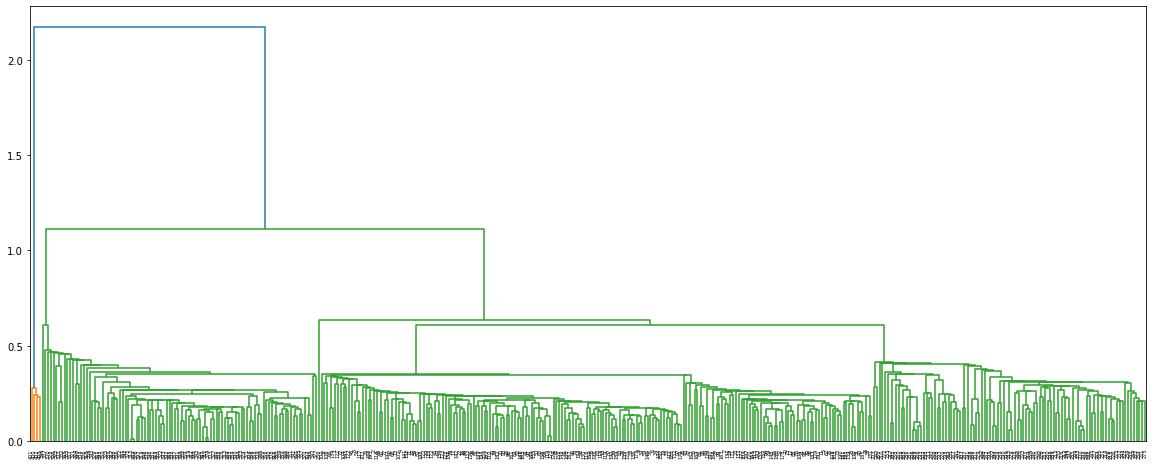

In [ ]:
#STEP1
#Dendogram

linkage_2 = linkage(data2, method='single', metric='euclidean')
dendrogram(linkage_2)

plt.gcf().set_size_inches(20,8)
plt.show()

In [ ]:
clustering_model2 = AgglomerativeClustering(n_clusters = n2, affinity = 'euclidean', linkage = 'single')
l2 = clustering_model2.fit_predict(data2)

In [ ]:
#To match the labels

df_data2 = df_data2.rename({'Unnamed: 0' :'Ind'}, axis='columns')
df_data2['Predicted'] = pd.Series(l2)

class_index_expected2 = df_data2.groupby('Class')['Ind'].apply(list).reset_index(name = 'List')
class_index_predicted2 = df_data2.groupby('Predicted')['Ind'].apply(list).reset_index(name = 'List')

for j in class_index_expected2['List']:
  for k in class_index_predicted2['List']:
    if j == k:
      for m in k:
        df_data2['Predicted'] = np.where(df_data2['Ind'] == m, df_data2['Class'], df_data2['Predicted'])
    elif len(np.intersect1d(j,k)) != 0:
      intersecting_elements = np.intersect1d(j,k)
      non_intersecting_elements = np.setxor1d(j, k)
      y = df_data2.loc[df_data2['Ind'] == intersecting_elements[0], 'Class']
      for m in intersecting_elements:
        df_data2['Predicted'] = np.where(df_data2['Ind'] == m, df_data2['Class'], df_data2['Predicted'])
      for n in non_intersecting_elements:
        df_data2['Predicted'] = np.where(df_data2['Ind'] == n, y, df_data2['Predicted'])

In [ ]:
#STEP2

print('Accuracy: ', accuracy_score(df_data2['Class'], df_data2['Predicted']))
print('F1 score: ', f1_score(df_data2['Class'], df_data2['Predicted'], average = 'micro'))

Accuracy:  0.504950495049505
F1 score:  0.504950495049505


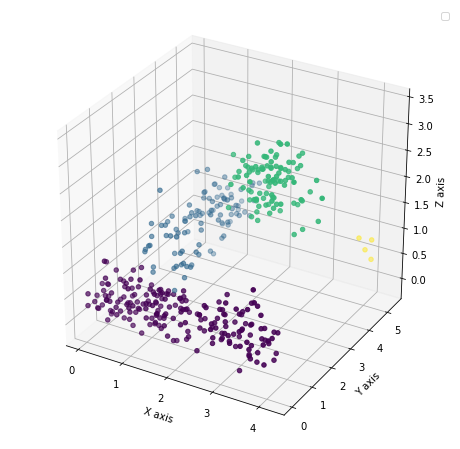

In [ ]:
#STEP3

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df_data2['X'], df_data2['Y'], df_data2['C'], c = df_data2['Class'])
ax.legend()
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.gcf().set_size_inches(8,8)

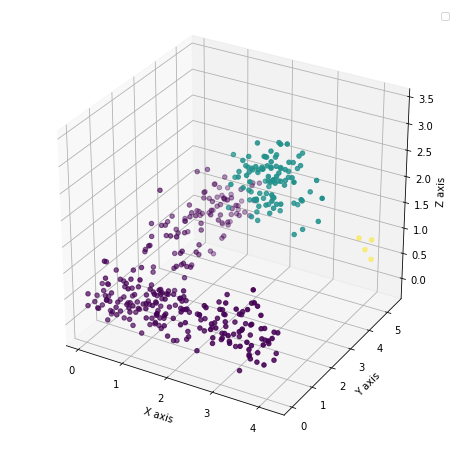

In [ ]:
#STEP4

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df_data2['X'], df_data2['Y'], df_data2['C'], c = df_data2['Predicted'])
ax.legend()
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.gcf().set_size_inches(8,8)

## Data3

### Kmeans

In [ ]:
df= pd.read_csv('Data3.csv')
#step1
pre = kmeans(df, 4)

In [ ]:
#step2
crp(df,relabel(df,pre))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00       100
           3       1.00      1.00      1.00       100
           4       1.00      1.00      1.00       100

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [ ]:
print('The accuracy_score:', accuracy_score(df['Class'], relabel(df, pre)))

The accuracy_score: 1.0


In [ ]:
print('The F_1_score:', f1_score(df['Class'], relabel(df, pre), average = 'micro'))

The F_1_score: 1.0


5


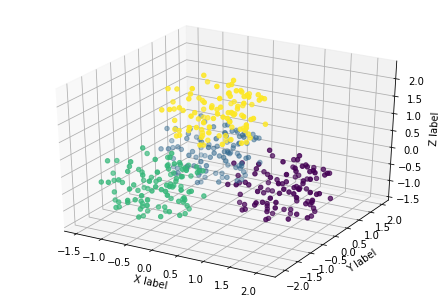

In [ ]:
#Step3
draw_originalclass(df)

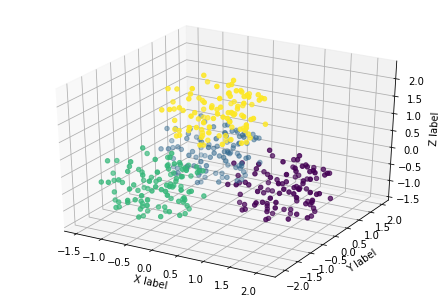

In [ ]:
#step4
draw_pridictclass2(df,relabel(df,pre))

### Hierarchical

In [ ]:
#Read data into dataframe
df_data3 = pd.read_csv('Data3.csv')

#number of clusters
n3 = df_data3['Class'].nunique()

#To match class range with clusters
df_data3['Class'] = df_data3['Class'] - 1

#Zipping datapoints
data3 = list(zip(df_data3['X1'], df_data3['X2'], df_data3['X3']))

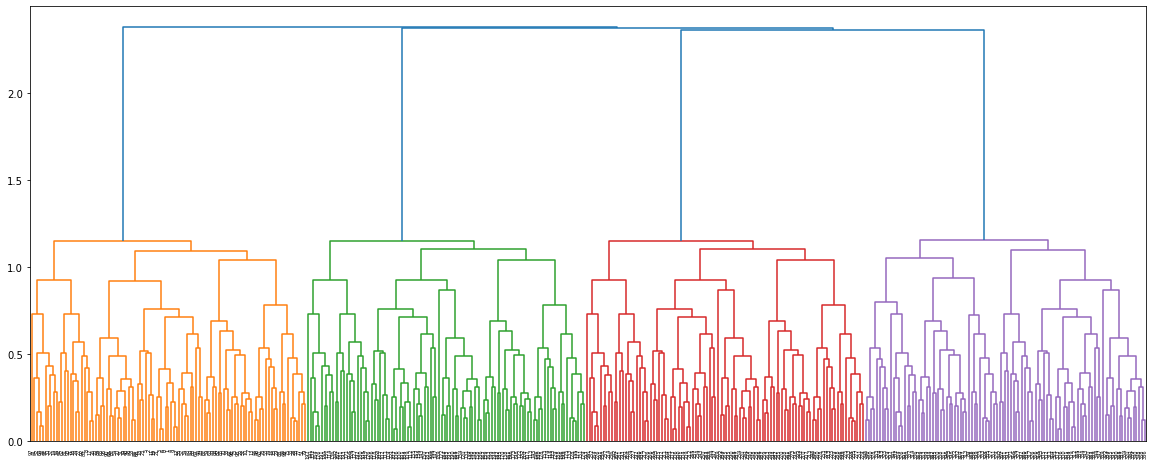

In [ ]:
#STEP1
#Dendogram

linkage_3 = linkage(data3, method='average', metric='euclidean')
dendrogram(linkage_3)

plt.gcf().set_size_inches(20,8)
plt.show()

In [ ]:
clustering_model3 = AgglomerativeClustering(n_clusters = n3, affinity = 'euclidean', linkage = 'average')
l3 = clustering_model3.fit_predict(data3)

In [ ]:
#To match the labels

df_data3 = df_data3.rename({'Unnamed: 0' :'Ind'}, axis='columns')
df_data3['Predicted'] = pd.Series(l3)

class_index_expected3 = df_data3.groupby('Class')['Ind'].apply(list).reset_index(name = 'List')
class_index_predicted3 = df_data3.groupby('Predicted')['Ind'].apply(list).reset_index(name = 'List')

for j in class_index_expected3['List']:
  for k in class_index_predicted3['List']:
    if j == k:
      for m in k:
        df_data3['Predicted'] = np.where(df_data3['Ind'] == m, df_data3['Class'], df_data3['Predicted'])
    elif np.intersect1d(j,k) != []:
      intersecting_elements = np.intersect1d(j,k)
      non_intersecting_elements = np.setxor1d(j, k)
      y = df_data3.loc[df_data3['Ind'] == intersecting_elements[0], 'Class']
      for m in intersecting_elements:
        df_data3['Predicted'] = np.where(df_data3['Ind'] == m, df_data3['Class'], df_data3['Predicted'])
      for n in non_intersecting_elements:
        df_data3['Predicted'] = np.where(df_data3['Ind'] == n, y, df_data3['Predicted'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


In [ ]:
#STEP2
print('Accuracy: ', accuracy_score(df_data3['Class'], df_data3['Predicted']))
print('F1 score: ', f1_score(df_data3['Class'], df_data3['Predicted'], average = 'micro'))

Accuracy:  0.9975
F1 score:  0.9975


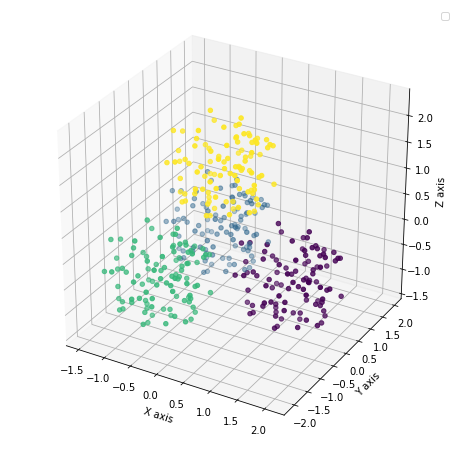

In [ ]:
#STEP3

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df_data3['X1'], df_data3['X2'], df_data3['X3'], c = df_data3['Class'])
ax.legend()
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.gcf().set_size_inches(8,8)

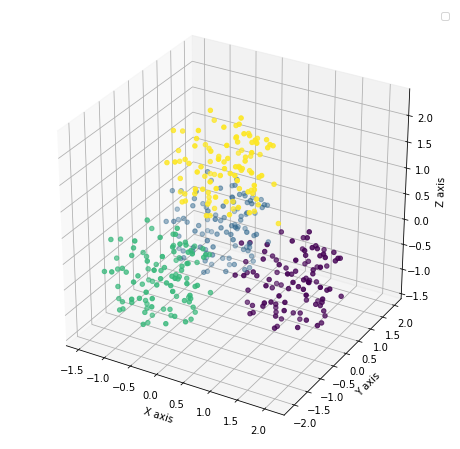

In [ ]:
#STEP4

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df_data3['X1'], df_data3['X2'], df_data3['X3'], c = df_data3['Predicted'])
ax.legend()
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.gcf().set_size_inches(8,8)

## Data4

### Kmeans

In [ ]:
df= pd.read_csv('Data4.csv')
#step1
pre=kmeans(df, 2)

In [ ]:
#step2
crp(df, relabel2(df, pre))

              precision    recall  f1-score   support

           1       0.65      0.65      0.65       500
           2       0.65      0.65      0.65       500

    accuracy                           0.65      1000
   macro avg       0.65      0.65      0.65      1000
weighted avg       0.65      0.65      0.65      1000



In [ ]:
print('The accuracy_score:', accuracy_score(df['Class'], relabel2(df, pre)))

The accuracy_score: 0.653


In [ ]:
print('The F_1_score:', f1_score(df['Class'], relabel2(df, pre), average = 'micro'))

The F_1_score: 0.653


5


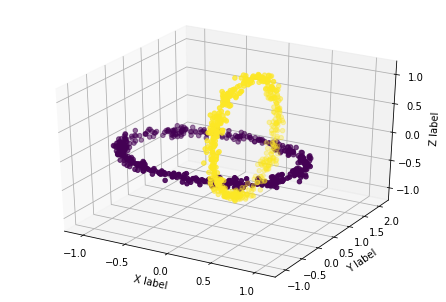

In [ ]:
#Step3
draw_originalclass(df)

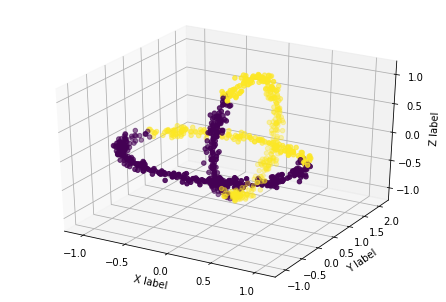

In [ ]:
#step4
draw_pridictclass(df, pre)

### Hierarchical

In [ ]:
#Read data into dataset
df_data4 = pd.read_csv('Data4.csv')

#number of clusters
n4 = df_data4['Class'].nunique()

#To match class range with clusters
df_data4['Class'] = df_data4['Class'] - 1

#Zipping datapoints
data4 = list(zip(df_data4['X1'], df_data4['X2'], df_data4['X3']))

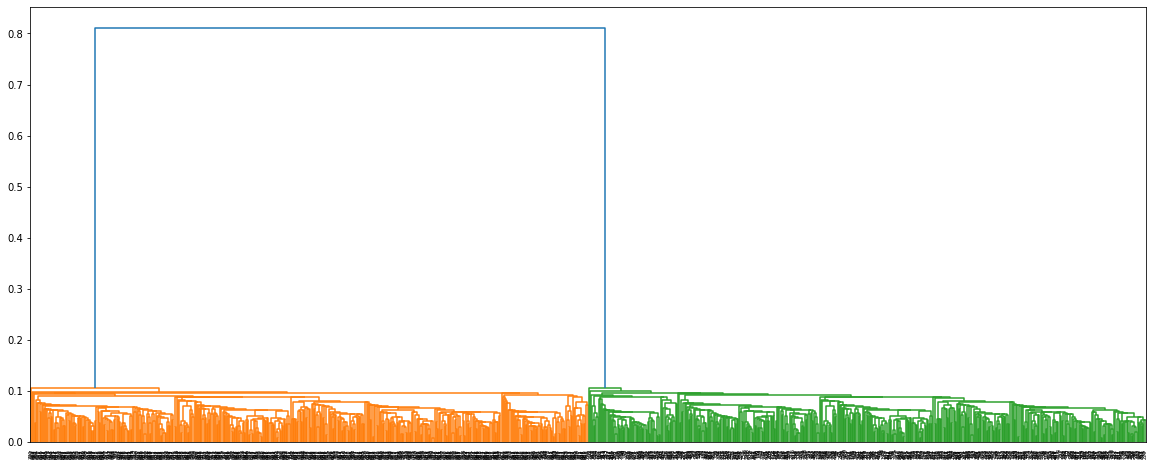

In [ ]:
#STEP1
#Dendogram

linkage_4 = linkage(data4, method='single', metric='euclidean')
dendrogram(linkage_4)

plt.gcf().set_size_inches(20,8)
plt.show()

In [ ]:
clustering_model4 = AgglomerativeClustering(n_clusters = n4, affinity = 'euclidean', linkage = 'single')
l4 = clustering_model4.fit_predict(data4)

df_data4 = df_data4.rename({'Unnamed: 0' :'Ind'}, axis='columns')
df_data4['Predicted'] = pd.Series(l4)

In [ ]:
#STEP2
print('Accuracy: ', accuracy_score(df_data4['Class'], df_data4['Predicted']))
print('F1 score: ', f1_score(df_data4['Class'], df_data4['Predicted'], average = 'micro'))

Accuracy:  1.0
F1 score:  1.0


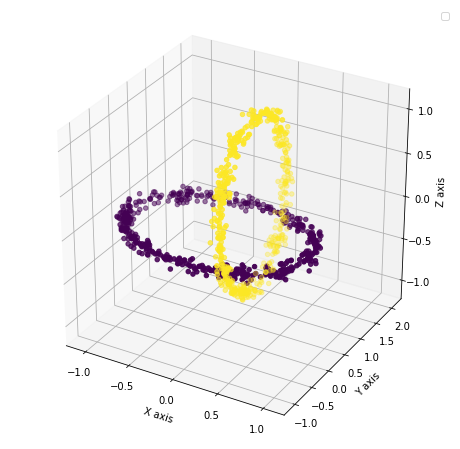

In [ ]:
#STEP3

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df_data4['X1'], df_data4['X2'], df_data4['X3'], c = df_data4['Class'])
ax.legend()
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.gcf().set_size_inches(8,8)

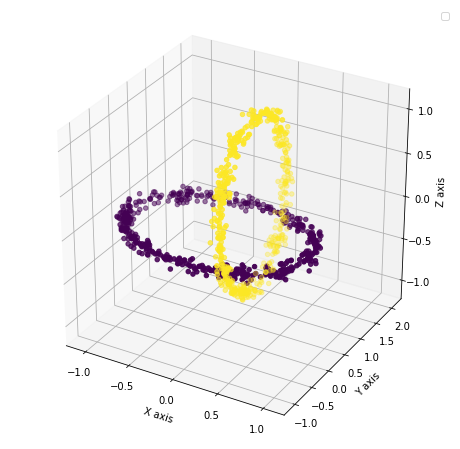

In [ ]:
#STEP4

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df_data4['X1'], df_data4['X2'], df_data4['X3'], c = df_data4['Predicted'])
ax.legend()
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.gcf().set_size_inches(8,8)

## Data 5

### Kmeans

In [ ]:
df= pd.read_csv('Data5.csv')
#step1
pre=kmeans(df, 2)

In [ ]:
#step2
crp(df, relabel2(df, pre))

              precision    recall  f1-score   support

           1       1.00      0.43      0.61       400
           2       0.64      1.00      0.78       400

    accuracy                           0.72       800
   macro avg       0.82      0.72      0.69       800
weighted avg       0.82      0.72      0.69       800



In [ ]:
print('The accuracy_score:', accuracy_score(df['Class'], relabel2(df, pre)))

The accuracy_score: 0.7175


In [ ]:
print('The F_1_score:', f1_score(df['Class'], pre.labels_, average = 'micro'))

The F_1_score: 0.7175


5


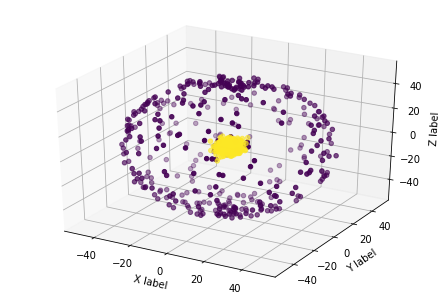

In [ ]:
#Step3
draw_originalclass(df)

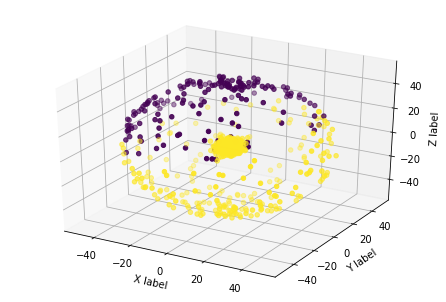

In [ ]:
#step4
draw_pridictclass2(df,pre.labels_)

### Hierarchical

In [ ]:
#Read data into dataframe
df_data5 = pd.read_csv('Data5.csv')

#number of clusters
n5 = df_data5['Class'].nunique()

#To match class range with clusters
df_data5['Class'] = df_data5['Class'] - 1

#Zipping datapoints
data5 = list(zip(df_data5['X1'], df_data5['X2'], df_data5['X3']))

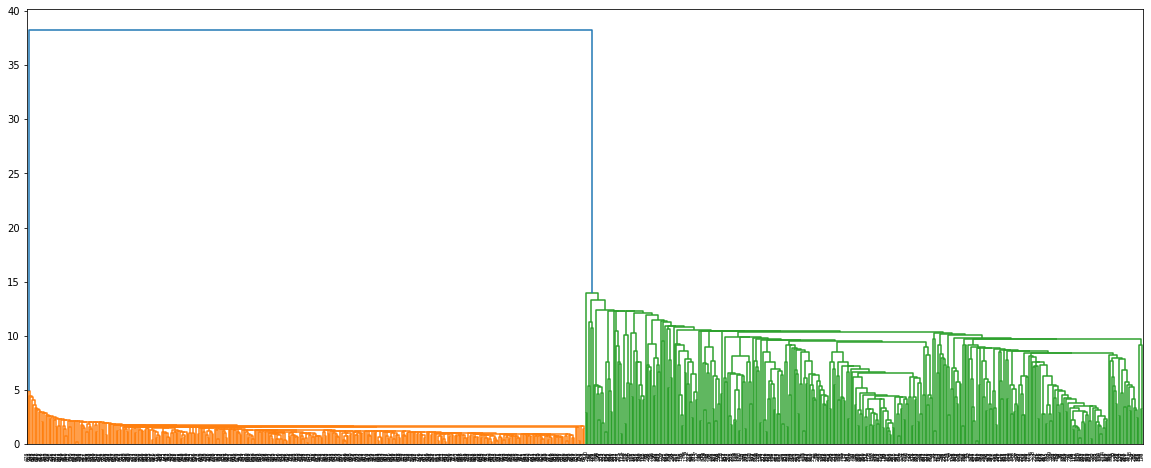

In [ ]:
#STEP1
#Dendogram

linkage_5 = linkage(data5, method='single', metric='euclidean')
dendrogram(linkage_5)

plt.gcf().set_size_inches(20,8)
plt.show()

In [ ]:
clustering_model5 = AgglomerativeClustering(n_clusters = n5, affinity = 'euclidean', linkage = 'single')
l5 = clustering_model5.fit_predict(data5)

df_data5 = df_data5.rename({'Unnamed: 0' :'Ind'}, axis='columns')
df_data5['Predicted'] = pd.Series(l5)

In [ ]:
#STEP2

print('Accuracy: ', accuracy_score(df_data5['Class'], df_data5['Predicted']))
print('F1 score: ', f1_score(df_data5['Class'], df_data5['Predicted'], average = 'micro'))

Accuracy:  1.0
F1 score:  1.0


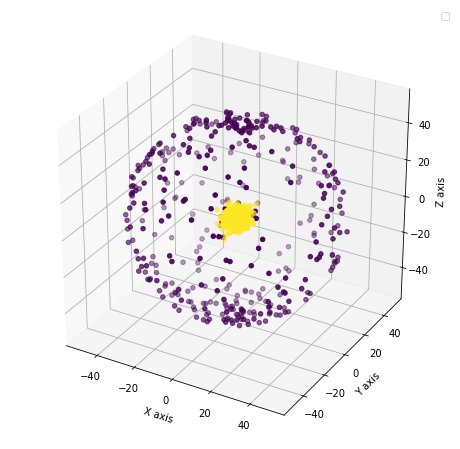

In [ ]:
#STEP3

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df_data5['X1'], df_data5['X2'], df_data5['X3'], c = df_data5['Class'])
ax.legend()
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.gcf().set_size_inches(8,8)

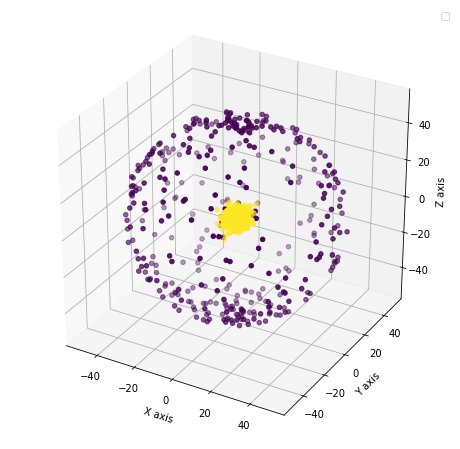

In [ ]:
#STEP4

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df_data5['X1'], df_data5['X2'], df_data5['X3'], c = df_data5['Predicted'])
ax.legend()
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.gcf().set_size_inches(8,8)

##Data6

### Kmeans

In [ ]:
df= pd.read_csv('Data6.csv')
df['Class'] = df['Class']
#step1
pre=kmeans(df,2)

In [ ]:
#step2
crp(df,relabel2(df, pre))

              precision    recall  f1-score   support

           1       0.93      0.98      0.95      2048
           2       0.98      0.93      0.95      2048

    accuracy                           0.95      4096
   macro avg       0.95      0.95      0.95      4096
weighted avg       0.95      0.95      0.95      4096



In [ ]:
print('The accuracy_score:', accuracy_score(df['Class'], relabel2(df, pre)))

The accuracy_score: 0.951416015625


In [ ]:
print('The F_1_score:', f1_score(df['Class'], relabel2(df, pre), average = 'micro'))

The F_1_score: 0.951416015625


4


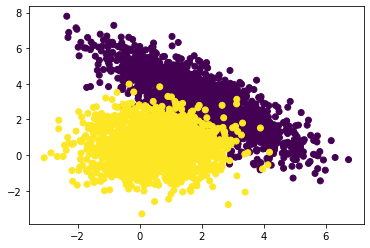

In [ ]:
#step3
draw_originalclass(df)

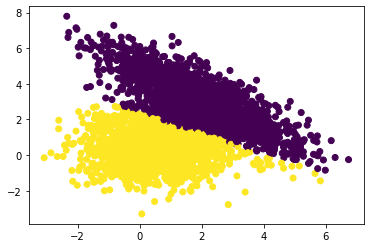

In [ ]:
#step4
draw_pridictclass2(df,pre.labels_)

### Hierarchical

In [ ]:
#Read data into dataframe
df_data6 = pd.read_csv('Data6.csv')

#number of clusters
n6 = df_data6['Class'].nunique()

#To match class range with clusters
df_data6['Class'] = df_data6['Class'] - 1

#Zipping datapoints
data6 = list(zip(df_data6['X1'], df_data6['X2']))

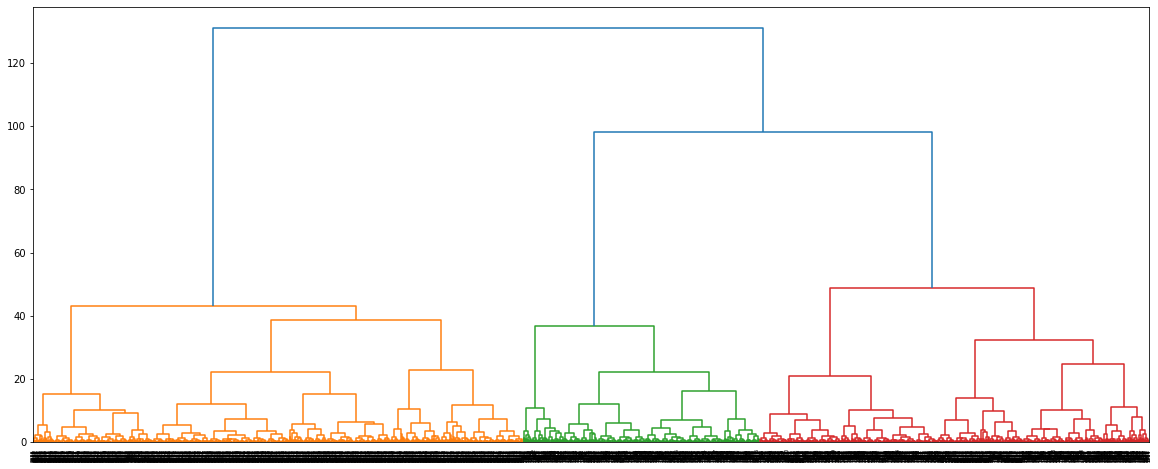

In [ ]:
#STEP1
#Dendogram

linkage_6 = linkage(data6, method='ward', metric='euclidean')
dendrogram(linkage_6)

plt.gcf().set_size_inches(20,8)
plt.show()

In [ ]:
clustering_model6 = AgglomerativeClustering(n_clusters = n6, affinity = 'euclidean', linkage = 'ward')
l6 = clustering_model6.fit_predict(data6)

df_data6 = df_data6.rename({'Unnamed: 0' :'Ind'}, axis='columns')
df_data6['Predicted'] = pd.Series(l6)

In [ ]:
#STEP2
print('Accuracy: ', accuracy_score(df_data6['Class'], df_data6['Predicted']))
print('F1 score: ', f1_score(df_data6['Class'], df_data6['Predicted'], average = 'micro'))

Accuracy:  0.923828125
F1 score:  0.923828125


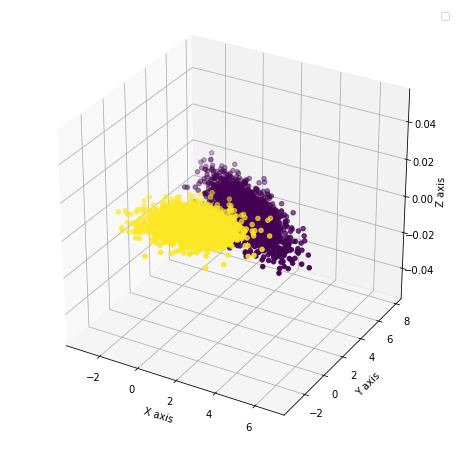

In [ ]:
#STEP3

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df_data6['X1'], df_data6['X2'], c = df_data6['Class'])
ax.legend()
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.gcf().set_size_inches(8,8)

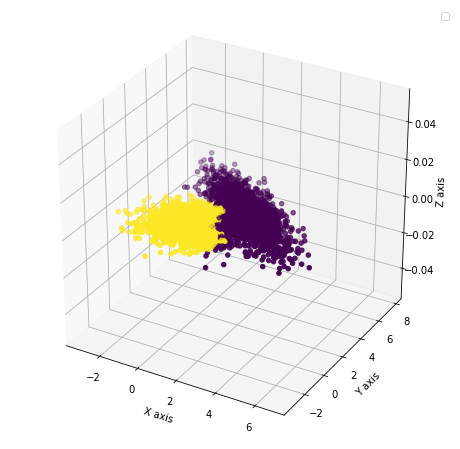

In [ ]:
#STEP4

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df_data6['X1'], df_data6['X2'], c = df_data6['Predicted'])
ax.legend()
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.gcf().set_size_inches(8,8)

##Data7

### Kmeans

In [ ]:
df= pd.read_csv('Data7.csv')
#step1
pre = kmeans(df, 6)

In [ ]:
#step2
crp(df, relabel(df, pre))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       395
           2       1.00      0.20      0.33       363
           3       0.04      1.00      0.07         3
           4       0.03      1.00      0.07         3
           5       0.04      1.00      0.07         3
           6       0.05      1.00      0.10         3

    accuracy                           0.62       770
   macro avg       0.36      0.87      0.27       770
weighted avg       0.99      0.62      0.67       770



In [ ]:
print('The accuracy_score:', accuracy_score(df['Class'], relabel(df, pre)))

The accuracy_score: 0.6207792207792208


In [ ]:
pre

KMeans(n_clusters=6, random_state=0)

In [ ]:
print('The F_1_score:', f1_score(df['Class'], relabel(df, pre), average = 'micro'))

The F_1_score: 0.6207792207792208


4


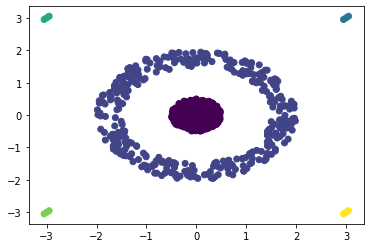

In [ ]:
#step3
draw_originalclass(df)

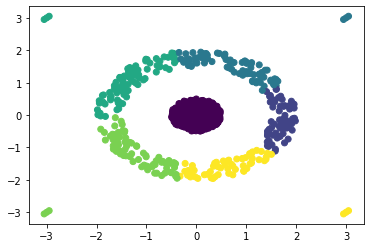

In [ ]:
#step4
draw_pridictclass2(df,relabel(df,pre))

### Hierarchical

In [ ]:
#Read data into dataframe
df_data7 = pd.read_csv('Data7.csv')

#number of clusters
n7 = df_data7['Class'].nunique()

#To match class range with clusters
df_data7['Class'] = df_data7['Class'] - 1

#Zipping datapoints
data7 = list(zip(df_data7['X1'], df_data7['X2']))

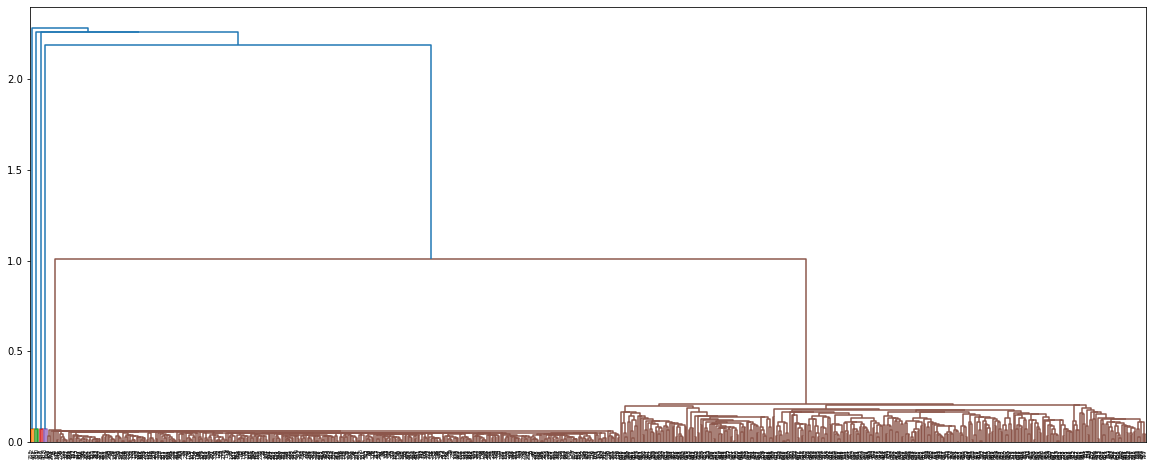

In [ ]:
#STEP1
#Dendogram

linkage_7 = linkage(data7, method='single', metric='euclidean')
dendrogram(linkage_7)

plt.gcf().set_size_inches(20,8)
plt.show()

In [ ]:
clustering_model7 = AgglomerativeClustering(n_clusters = n7, affinity = 'euclidean', linkage = 'single')
l7 = clustering_model7.fit_predict(data7)

df_data7 = df_data7.rename({'Unnamed: 0' :'Ind'}, axis='columns')
df_data7['Predicted'] = pd.Series(l7)

In [ ]:
#To match the labels
class_index_expected7 = df_data7.groupby('Class')['Ind'].apply(list).reset_index(name = 'List')
class_index_predicted7 = df_data7.groupby('Predicted')['Ind'].apply(list).reset_index(name = 'List')

for j in class_index_expected7['List']:
  for k in class_index_predicted7['List']:
    if j == k:
      for m in k:
        df_data7['Predicted'] = np.where(df_data7['Ind'] == m, df_data7['Class'], df_data7['Predicted'])
    elif np.intersect1d(j,k) != []:
      intersecting_elements = np.intersect1d(j,k)
      non_intersecting_elements = np.setxor1d(j, k)
      y = df_data7.loc[df_data7['Ind'] == intersecting_elements[0], 'Class']
      for m in intersecting_elements:
        df_data7['Predicted'] = np.where(df_data7['Ind'] == m, df_data7['Class'], df_data7['Predicted'])
      for n in non_intersecting_elements:
        df_data7['Predicted'] = np.where(df_data7['Ind'] == n, y, df_data7['Predicted'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
#STEP2

print('Accuracy: ', accuracy_score(df_data7['Class'], df_data7['Predicted']))
print('F1 score: ', f1_score(df_data7['Class'], df_data7['Predicted'], average = 'micro'))

Accuracy:  1.0
F1 score:  1.0


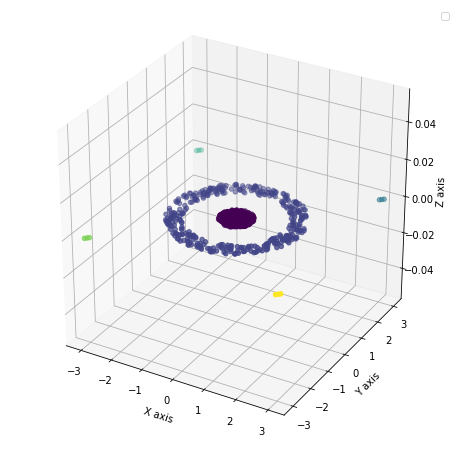

In [ ]:
#STEP3

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df_data7['X1'], df_data7['X2'], c = df_data7['Class'])
ax.legend()
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.gcf().set_size_inches(8,8)

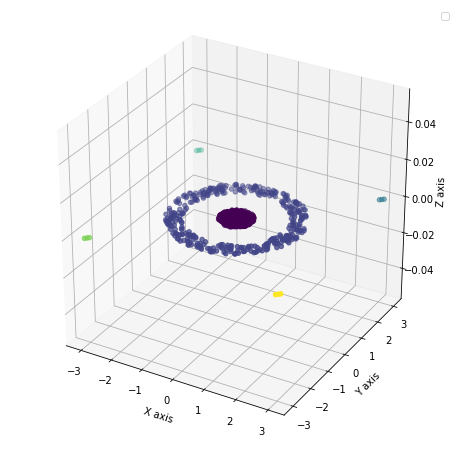

In [ ]:
#STEP4

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df_data7['X1'], df_data7['X2'], c = df_data7['Predicted'])
ax.legend()
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.gcf().set_size_inches(8,8)

## Data8

### Kmeans

In [ ]:
df= pd.read_csv('Data8.csv')
#step1
pre=kmeans(df,1)

In [ ]:
#step2
crp(df,relabel(df,pre))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      4002

    accuracy                           1.00      4002
   macro avg       1.00      1.00      1.00      4002
weighted avg       1.00      1.00      1.00      4002



In [ ]:
print('The accuracy_score:',accuracy_score(df['Class'],relabel(df,pre)))

The accuracy_score: 1.0


In [ ]:
print('The F_1_score:',f1_score(df['Class'],relabel(df,pre), average = 'micro'))

The F_1_score: 1.0


5


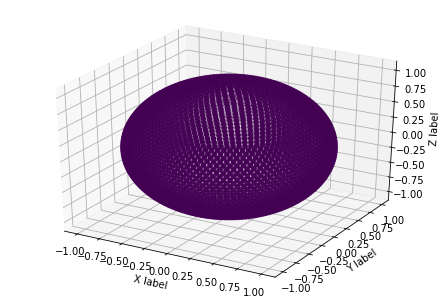

In [ ]:
#Step3
draw_originalclass(df)

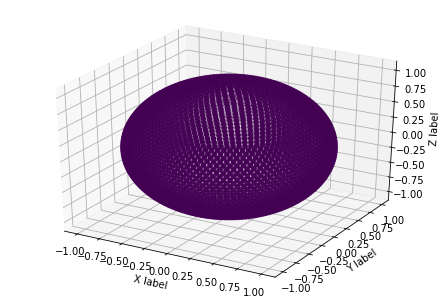

In [ ]:
#step4
draw_pridictclass(df,pre)

### Hierarchical

In [ ]:
#Read data into dataframe
df_data8 = pd.read_csv('Data8.csv')

#number of clusters
n8 = df_data8['Class'].nunique()

#To match class range with clusters
df_data8['Class'] = df_data8['Class'] - 1

#Zipping datapoints
data8 = list(zip(df_data8['X1'], df_data8['X2'], df_data8['X3']))

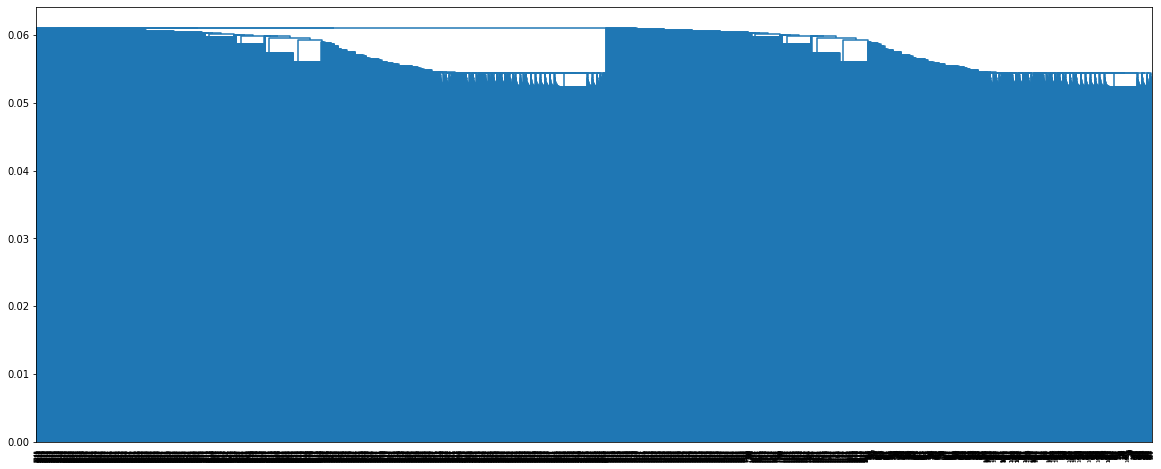

In [ ]:
#STEP1
#Dendogram

linkage_8 = linkage(data8, method='single', metric='euclidean')
dendrogram(linkage_8)

plt.gcf().set_size_inches(20,8)
plt.show()

In [ ]:
clustering_model8 = AgglomerativeClustering(n_clusters = n8, affinity = 'euclidean', linkage = 'single')
l8 = clustering_model8.fit_predict(data8)

df_data8 = df_data8.rename({'Unnamed: 0' :'Ind'}, axis='columns')
df_data8['Predicted'] = pd.Series(l8)

In [ ]:
#STEP2

print('Accuracy: ', accuracy_score(df_data8['Class'], df_data8['Predicted']))
print('F1 score: ', f1_score(df_data8['Class'], df_data8['Predicted'], average = 'micro'))

Accuracy:  1.0
F1 score:  1.0


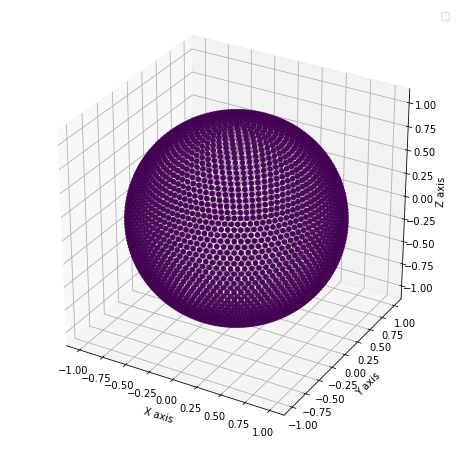

In [ ]:
#STEP3

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df_data8['X1'], df_data8['X2'], df_data8['X3'], c = df_data8['Class'])
ax.legend()
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.gcf().set_size_inches(8,8)

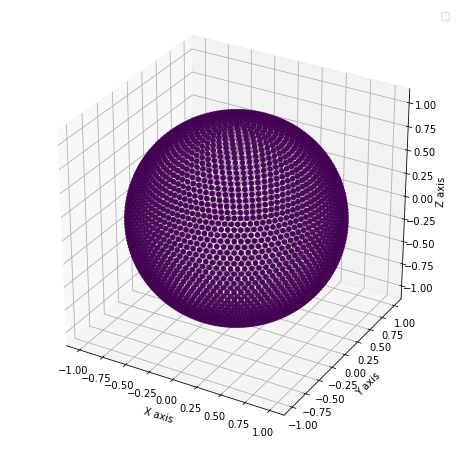

In [ ]:
#STEP4

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df_data8['X1'], df_data8['X2'], df_data8['X3'], c = df_data8['Predicted'])
ax.legend()
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.gcf().set_size_inches(8,8)

# Task 2 - K means

In [ ]:
#upload data
uploaded = files.upload()

Saving World Indicators.csv to World Indicators (1).csv


In [ ]:
df = pd.read_csv('World Indicators.csv')

Here we customerize some functions to help us finish the task2.


*   del_c => Delete some columns.（Delete Some colums can help us solve data loss probelm.)
*   datacleaning => DO datacleaning work. Delete the missing values rows and do data Scaling.(Because if  we fill the missing value by using average or median,this can cause the underestimation or overestimation of some countries. So We delete the row with missing Values)
*   Internal_validation_metrics => Use Internal validation metrics to report the cluster quality
*   print_clustering_solution => Report the best clustering solution.
*   raw_scatter_plots => Generate three different scatter plots of choice and color the data points
according to the group
*   decision_k => Return the best k value.

In [ ]:
def del_c(data):
    d2 = data.drop(['Energy Usage', 'Lending Interest'], axis=1)
    return d2


def datacleaning(data):
    #change Text to numbers
    data['Business Tax Rate']=data['Business Tax Rate'].str.slice(0,-1).astype(float)
    data['GDP'] = data['GDP'].str.replace(',','')
    data['GDP'] = data['GDP'].str.slice(1,-1).astype(float)
    data['Health Exp/Capita'] = data['Health Exp/Capita'].str.replace(',','')
    data['Health Exp/Capita'] = data['Health Exp/Capita'].str.slice(1,-1).astype(float)
    #Drop all missing values rows 
    data=data.dropna()
    #data Scaling
    data['GDP'] = data['GDP']/10000000
    return data



def Internal_validation_metrics(data,kmeans):
  
    a = kmeans.labels_
    print('CH Cohesive Data: ' + str(
        metrics.calinski_harabasz_score(data, kmeans.labels_)))
    dist_cohesive = pairwise_distances(data)
    dunn_cohesive = dunn(dist_cohesive, kmeans.labels_)
    print('DI Data: ' + str(dunn_cohesive))
    

def print_clustering_solution(data,k,pred):
    for i in range(0,k):
      allindex=[]
      index=0
      a=data.index
      b=a[index]
      for j in pred.labels_:
        if j==i:
         b = a[index]
         allindex.append(data['Country'][b])
        index=index+1
      print(i,'result:',allindex) 


def decision_k(data,Max_num):
    All=[]
    for i in range(2,Max_num):
        k = KMeans(n_clusters=i).fit_predict(data)
        # get silhouette 
        silhouette_vals = silhouette_samples(data, k)
        avg_score = np.mean(silhouette_vals)
        print(i,':',avg_score)
        All.append(avg_score)
    #Find the max value    
    max_list = max(All)  
    max_index = All.index(max_list)
    return max_index+2

    
#step 4
def draw_scatter_plots(data,col1,col2,pred):
    plt.scatter(data.iloc[:, col1], data.iloc[:, col2], c=pred.labels_)
    plt.show()

In [ ]:
#Perform data cleaning
df = datacleaning(del_c(df))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [ ]:
#Find the best k values and step2

i = decision_k(df.iloc[:, 0:16], 10)
pred = KMeans(n_clusters = i, random_state = 0).fit(df.iloc[:, 0:16])
print('K = ',i)
Internal_validation_metrics(df.iloc[:, 0:16], pred)


2 : 0.9406057688456068
3 : 0.8813959573791053
4 : 0.8692246965466077
5 : 0.7785090124976097
6 : 0.7289916905152571
7 : 0.7263915413855803
8 : 0.7005730873122542
9 : 0.7024974125067698
K =  2
CH Cohesive Data: 410.4091654939799
DI Data: 0.23654853444072863


In [ ]:
#step 3
print('Below are the resultant clusters')
print_clustering_solution(df, 2, pred)

Below are the resultant clusters
0 result: ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Djibouti', 'Egypt, Arab Rep.', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia, The', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Seychelles', 'Sierra Leone', 'South Africa', 'Sudan', 'Swaziland', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Afghanistan', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Bhutan', 'Brunei Darussalam', 'Cambodia', 'Georgia', 'India', 'Indonesia', 'Kazakhstan', 'Korea, Rep.', 'Kyrgyz Republic', 'Lao PDR', 'Malaysia', 'Mongolia', 'Nepal', 'Pakistan', 'Philippines', 'Singapore', 'Sri Lanka', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Uzbekistan',

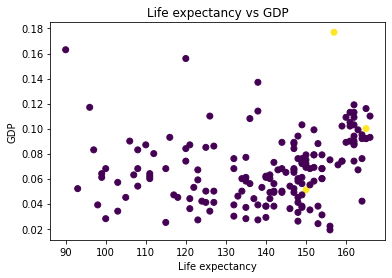

In [ ]:
#step4_1
df['Life expectancy'] = df['Life Expectancy Male'] + df['Life Expectancy Female']
plt.scatter(df['Life expectancy'], df.iloc[:, 4], c = pred.labels_)
plt.xlabel('Life expectancy') 
plt.ylabel('GDP') 
  
# displaying the title
plt.title("Life expectancy vs GDP")
  
plt.show() 

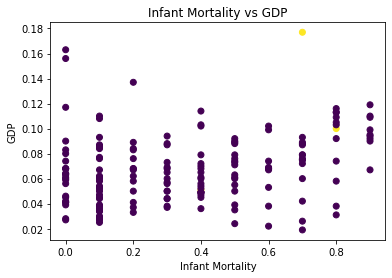

In [ ]:
#step4_2
plt.scatter(df.iloc[:, 8], df.iloc[:, 4], c = pred.labels_)
plt.xlabel('Infant Mortality') 
plt.ylabel('GDP') 
  
# displaying the title
plt.title("Infant Mortality vs GDP")
  
plt.show() 

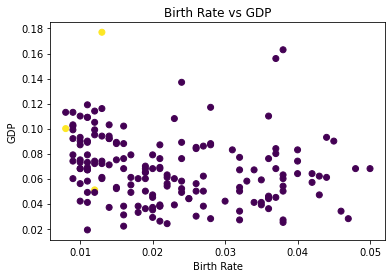

In [ ]:
#step4_3
plt.scatter(df.iloc[:, 0], df.iloc[:, 4], c = pred.labels_)
plt.xlabel('Birth Rate') 
plt.ylabel('GDP') 
  
# displaying the title
plt.title("Birth Rate vs GDP")
  
plt.show() 


# Task 2 - Hierarchical Clustering

In [ ]:
!pip install category-encoders

In [23]:
#converting regions to ordinal
from category_encoders import OrdinalEncoder

#Data Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
 


Data cleaning


In [5]:
def find_not_null(data):
    d2=data
    notnull=data.dropna(axis=0, how='any')
    return notnull


def datacleaning(data):
    data['Business Tax Rate']=data['Business Tax Rate'].str.slice(0,-1).astype(float)
    data['GDP'] = data['GDP'].str.replace(',','')
    data['GDP'] = data['GDP'].str.slice(1,-1).astype(float)
    data['Health Exp/Capita'] = data['Health Exp/Capita'].str.replace(',','')
    data['Health Exp/Capita'] = data['Health Exp/Capita'].str.slice(1,-1).astype(float)
    data=data.dropna()
    return data


Upload and read the file

In [6]:
from google.colab import files
uploaded = files.upload()

Saving World Indicators.csv to World Indicators.csv


In [7]:
#read the file
df= pd.read_csv('World Indicators.csv')

Remove NaNs


In [8]:
#Check for nulls
df.isna().sum()

Birth Rate                 9
Business Tax Rate         27
Days to Start Business    27
Energy Usage              72
GDP                       20
Health Exp % GDP          23
Health Exp/Capita         23
Hours to do Tax           28
Infant Mortality Rate     20
Internet Usage             9
Lending Interest          77
Life Expectancy Female    11
Life Expectancy Male      11
Mobile Phone Usage        12
Population 0-14           17
Population 15-64          17
Population 65+            17
Population Urban           2
Region                     0
Country                    0
dtype: int64

In [9]:
#Drop columns that are nulls mostly
df=df.drop(['Lending Interest','Energy Usage'],axis=1)

In [10]:
#drop any rows with nulls
df_notna=find_not_null(df)


In [11]:
#shape of the dataframe after dropping null
df_notna.shape

(171, 18)

In [12]:
df_notna.isna().sum()

Birth Rate                0
Business Tax Rate         0
Days to Start Business    0
GDP                       0
Health Exp % GDP          0
Health Exp/Capita         0
Hours to do Tax           0
Infant Mortality Rate     0
Internet Usage            0
Life Expectancy Female    0
Life Expectancy Male      0
Mobile Phone Usage        0
Population 0-14           0
Population 15-64          0
Population 65+            0
Population Urban          0
Region                    0
Country                   0
dtype: int64

In [13]:
#Clean the columns - with %, $ and comma
df_cleaned=datacleaning(df_notna)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [14]:
#Snipped of the non-na, cleaned dataset
df_cleaned.sample(15)

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
206,0.020,62.8,141.0,3.164822e+10,0.045,48.0,864.0,0.014,0.4,77.0,71.0,1.0,0.291,0.651,0.058,0.888,The Americas,"Venezuela, RB"
190,0.019,52.7,6.0,1.170086e+11,0.060,60.0,347.0,0.014,0.4,79.0,75.0,0.8,0.295,0.643,0.061,0.781,The Americas,Mexico
10,0.044,339.1,65.0,2.383163e+09,0.061,1.0,336.0,0.090,0.0,51.0,48.0,0.2,0.453,0.519,0.028,0.404,Africa,"Congo, Dem. Rep."
150,0.021,38.3,45.0,3.753485e+08,0.038,16.0,163.0,0.020,0.3,73.0,67.0,0.8,0.289,0.661,0.050,0.522,Oceania,Fiji
124,0.013,46.9,29.0,1.904793e+11,0.061,80.0,290.0,0.010,0.5,76.0,64.0,1.4,0.151,0.718,0.130,0.737,Europe,Russian Federation
185,0.032,40.9,37.0,4.765479e+09,0.067,21.0,344.0,0.028,0.1,75.0,68.0,1.3,0.412,0.544,0.045,0.498,The Americas,Guatemala
70,0.028,31.9,93.0,8.254088e+08,0.028,3.0,362.0,0.057,0.1,69.0,66.0,0.8,0.362,0.601,0.037,0.343,Asia,Lao PDR
139,0.028,27.7,12.0,2.884020e+09,0.088,38.0,151.0,0.017,0.3,75.0,72.0,1.1,0.346,0.620,0.034,0.827,Middle East,Jordan
142,0.022,22.0,8.0,6.997191e+09,0.024,61.0,62.0,0.010,0.5,79.0,74.0,1.6,0.257,0.717,0.026,0.757,Middle East,Oman
204,0.013,46.5,5.0,1.553380e+12,0.177,846.0,187.0,0.006,0.7,81.0,76.0,0.9,0.197,0.669,0.133,0.809,The Americas,United States


Data Scaling

In [22]:
#convert categorical to numeric



In [17]:
#unique values of region
df_cleaned['Region'].unique() 


mapping = [{'col': 'Region', 'mapping': {'Africa': 1, 'Asia': 2, 'Middle East': 3,'Oceania':4,'The Americas':5, 'Europe':6}}]
final=OrdinalEncoder(cols=['Region'], mapping=mapping).fit(df_cleaned).transform(df_cleaned)

In [18]:
final.sample(5)

,Birth Rate,Business Tax Rate,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,Region,Country
19,0.043,283.2,27.0,8.982829e+07,0.047,2.0,376.0,0.051,0.1,60.0,57.0,0.8,0.459,0.516,0.025,0.570,1,"Gambia, The"
130,0.012,52.0,16.0,5.360006e+10,0.095,541.0,122.0,0.002,0.9,84.0,80.0,1.2,0.166,0.649,0.185,0.852,6,Sweden
51,0.043,14.4,18.0,1.920169e+09,0.062,8.0,183.0,0.059,0.1,57.0,54.0,0.6,0.468,0.505,0.026,0.392,1,Zambia
115,0.010,41.0,40.0,9.302057e+08,0.087,190.0,139.0,0.005,0.7,83.0,79.0,1.2,0.153,0.697,0.150,0.948,6,Malta
201,0.018,27.9,694.0,4.363219e+08,0.060,49.0,199.0,0.022,0.3,74.0,67.0,1.0,0.283,0.652,0.065,0.663,5,Suriname


In [19]:
#array version of the cleaned table
df_array=final.iloc[:,0:16].to_numpy()

In [20]:
df_array

array([[2.50e-02, 7.20e+01, 2.50e+01, ..., 6.81e-01, 4.70e-02, 6.82e-01],
       [4.60e-02, 5.21e+01, 6.60e+01, ..., 4.99e-01, 2.40e-02, 4.09e-01],
       [3.70e-02, 6.59e+01, 2.90e+01, ..., 5.39e-01, 2.90e-02, 4.23e-01],
       ...,
       [1.30e-02, 4.65e+01, 5.00e+00, ..., 6.69e-01, 1.33e-01, 8.09e-01],
       [1.50e-02, 4.19e+01, 7.00e+00, ..., 6.38e-01, 1.39e-01, 9.46e-01],
       [2.00e-02, 6.28e+01, 1.41e+02, ..., 6.51e-01, 5.80e-02, 8.88e-01]])

In [24]:
#Data Scaling
X =df_array
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)
X_standard

array([[ 0.24108544,  0.73367294, -0.0992689 , ...,  0.66894359,
        -0.55875005,  0.541928  ],
       [ 2.16923203,  0.18971241,  0.61163433, ..., -1.88897045,
        -0.98233601, -0.63689987],
       [ 1.34288349,  0.56693127, -0.02991249, ..., -1.32679154,
        -0.89025211, -0.57644716],
       ...,
       [-0.86071261,  0.03663809, -0.44605096, ...,  0.50028992,
         1.0250931 ,  1.09032046],
       [-0.6770796 , -0.08910153, -0.41137276, ...,  0.06460126,
         1.13559379,  1.68189342],
       [-0.21799708,  0.4821937 ,  1.91206706, ...,  0.24730941,
        -0.35616546,  1.43144647]])

Dendogram

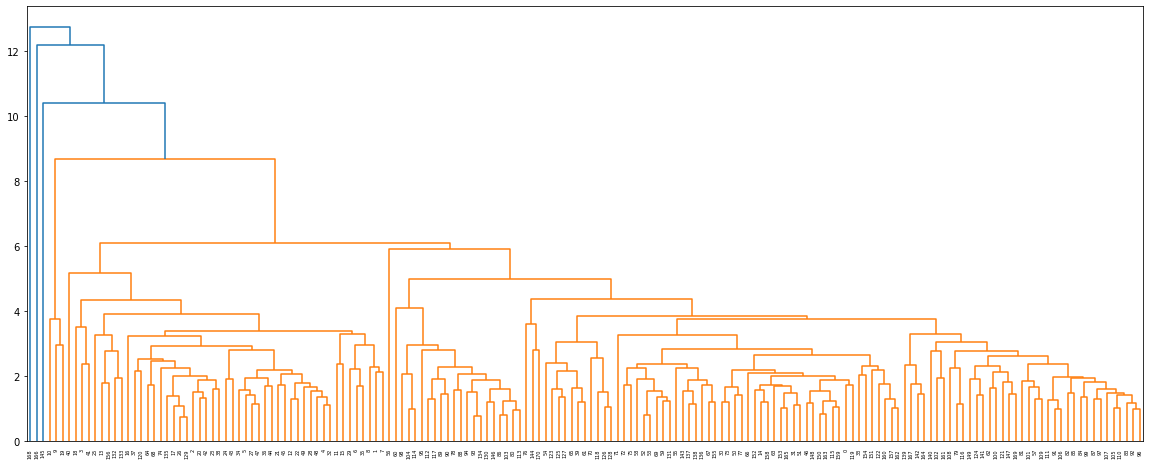

In [33]:
#create the dendogram

linkage_wi = linkage(X_standard, method='average', metric='euclidean')
dendrogram(linkage_wi)

plt.gcf().set_size_inches(20,8)
plt.show()

Clustering + Internal Validation

In [28]:

def Internal_validation_metrics(data,agglomerative):
  
    a=agglomerative.labels_
    print('CH Cohesive Data: ' + str(
        metrics.calinski_harabasz_score(data, agglomerative.labels_)))
    dist_cohesive = pairwise_distances(data)
    dunn_cohesive = dunn(dist_cohesive, agglomerative.labels_)
    print('DI Data: ' + str(dunn_cohesive))
      


def decision_agg(data,Max_num,link):
    print("------------------------",link,"-----------------------")
    All=[]
    for i in range(2,Max_num):
        k = AgglomerativeClustering(n_clusters = i, affinity = 'euclidean', linkage = link).fit_predict(data)
        # get silhouette 
        silhouette_vals = silhouette_samples(data, k)
        avg_score = np.mean(silhouette_vals)
        print(i,':',avg_score)
        All.append(avg_score)
    #Find the max value    
    max_list = max(All)  
    max_index = All.index(max_list)
    return max_index+2


In [30]:
df_scaled=pd.DataFrame(X_standard, columns=final.columns[0:16])

In [32]:
i = decision_agg(df_scaled.iloc[:, 0:16], 10, 'single')
pred_single =  AgglomerativeClustering(n_clusters = i, affinity = 'euclidean', linkage = 'single').fit(X_standard)
print('cluster = ',i)
Internal_validation_metrics(df_scaled.iloc[:, 0:16], pred_single)

i = decision_agg(df_scaled.iloc[:, 0:16], 10, 'complete')
pred_complete =  AgglomerativeClustering(n_clusters = i, affinity = 'euclidean', linkage = 'complete').fit(X_standard)
print('cluster = ',i)
Internal_validation_metrics(df_scaled.iloc[:, 0:16], pred_complete)

i = decision_agg(df_scaled.iloc[:, 0:16], 10, 'ward')
pred_ward =  AgglomerativeClustering(n_clusters = i, affinity = 'euclidean', linkage = 'ward').fit(X_standard)
print('cluster = ',i)
Internal_validation_metrics(df_scaled.iloc[:, 0:16], pred_ward)

i = decision_agg(df_scaled.iloc[:, 0:16], 10, 'average')
pred_avg =  AgglomerativeClustering(n_clusters = i, affinity = 'euclidean', linkage = 'average').fit(X_standard)
print('cluster = ',i)
Internal_validation_metrics(df_scaled.iloc[:, 0:16], pred_avg)


------------------------ single -----------------------
2 : 0.5868655808176999
3 : 0.5731234136769431
4 : 0.5167587564883266
5 : 0.24448606307576207
6 : 0.24069785419291276
7 : 0.2099901731190477
8 : 0.17118467984768965
9 : 0.03683778222583809
cluster =  2
CH Cohesive Data: 8.723023082525607
DI Data: 0.6011639861162731
------------------------ complete -----------------------
2 : 0.5978637750988245
3 : 0.5731234136769431
4 : 0.36328733176634476
5 : 0.3671723589746414
6 : 0.3673521487953928
7 : 0.23941346912229317
8 : 0.21524543226819992
9 : 0.20757103648941255
cluster =  2
CH Cohesive Data: 9.678688156117957
DI Data: 0.5198138689098835
------------------------ ward -----------------------
2 : 0.3532797123021895
3 : 0.2903249687285491
4 : 0.21632571174176418
5 : 0.21378239223526369
6 : 0.22483929641227668
7 : 0.21827440096542458
8 : 0.2248563003649869
9 : 0.18715636370973676
cluster =  2
CH Cohesive Data: 105.43682364453039
DI Data: 0.08888915943153057
------------------------ average -

In [ ]:
#Average linkage creates the best SI value

Graphs

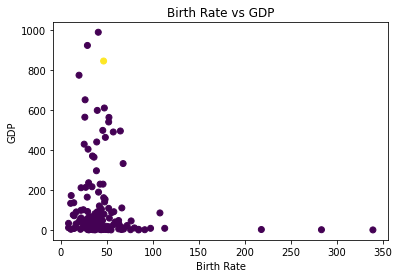

In [36]:
#Graph 1 - Birth Rate vs GDP
plt.scatter(final.iloc[:, 1], final.iloc[:, 5], c = pred_avg.labels_)
plt.xlabel('Birth Rate') 
plt.ylabel('GDP') 
  
# displaying the title
plt.title("Birth Rate vs GDP")
  
plt.show() 


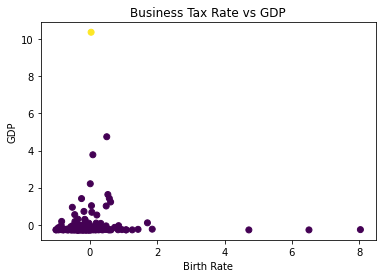

In [39]:
#Graph 2 - Business Tax Rate vs GDP


plt.scatter(df_scaled['Business Tax Rate'], df_scaled['GDP'], c =pred_avg.labels_)
plt.xlabel('Birth Rate') 
plt.ylabel('GDP') 
  
# displaying the title
plt.title("Business Tax Rate vs GDP")
  
plt.show() 




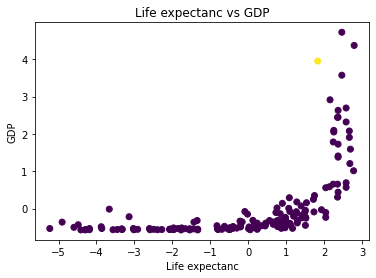

In [40]:
#Life Expectancy vs GDP
df_scaled['Life expectancy'] = df_scaled['Life Expectancy Male'] + df_scaled['Life Expectancy Female']
plt.scatter(df_scaled['Life expectancy'], df_scaled.iloc[:, 5], c = pred_avg.labels_)
plt.xlabel('Life expectanc') 
plt.ylabel('GDP') 
  
# displaying the title
plt.title("Life expectanc vs GDP")
  
plt.show() 